In [38]:
import network
import common
from network import Network
from network import ConvPoolLayer, FullyConnectedLayer, SoftmaxLayer
from network import ReLU
%matplotlib inline

In [8]:
training_data = common.load_data('./data/train.csv', 1)
validation_data = common.load_data('./data/validation.csv', 1)
test_data = common.load_data('./data/test.csv')

training_data_shared = network.shared(training_data)
validation_data_shared = network.shared(validation_data)
test_data_shared = network.shared(test_data)

In [9]:
mini_batch_size = 10

In [39]:
net = Network([
    ConvPoolLayer(image_shape=(mini_batch_size, 1, 28, 28), 
                      filter_shape=(20, 1, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
    ConvPoolLayer(image_shape=(mini_batch_size, 20, 12, 12), 
                      filter_shape=(40, 20, 5, 5), 
                      poolsize=(2, 2), 
                      activation_fn=ReLU),
    FullyConnectedLayer(
            n_in=40*4*4, n_out=1000, activation_fn=ReLU, p_dropout=0.5),
    FullyConnectedLayer(
            n_in=1000, n_out=1000, activation_fn=ReLU, p_dropout=0.5),
    SoftmaxLayer(n_in=1000, n_out=10, p_dropout=0.5)], 
        mini_batch_size)

In [40]:
net.SGD(training_data_shared, 40, mini_batch_size, 0.03, validation_data_shared, test_data_shared)

Training mini-batch number 0
Training mini-batch number 1000
Training mini-batch number 2000
Training mini-batch number 3000
Training mini-batch number 4000
Epoch 0: validation accuracy 95.93%
This is the best validation accuracy to date.
Training mini-batch number 5000
Training mini-batch number 6000
Training mini-batch number 7000
Training mini-batch number 8000
Epoch 1: validation accuracy 97.20%
This is the best validation accuracy to date.
Training mini-batch number 9000
Training mini-batch number 10000
Training mini-batch number 11000
Training mini-batch number 12000
Epoch 2: validation accuracy 97.57%
This is the best validation accuracy to date.
Training mini-batch number 13000
Training mini-batch number 14000
Training mini-batch number 15000
Training mini-batch number 16000
Epoch 3: validation accuracy 97.57%
This is the best validation accuracy to date.
Training mini-batch number 17000
Training mini-batch number 18000
Training mini-batch number 19000
Training mini-batch numbe

KeyboardInterrupt: 

Resolved: 7


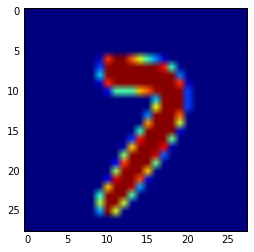

In [43]:
#debug
x, y = test_data
i=29
common.printImgFromVector(x[i])
#print('Correct: '+ str(y[i]))
print('Resolved: ' + str(net.test_mb_predictions(i/mini_batch_size)[i%mini_batch_size]))

In [44]:
import csv
def export_to_submission(network):
    with open('data/submission.csv', 'wb') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwriter.writerow(['ImageId', 'Label'])
        for i in range(28000):
            digit_decision = net.test_mb_predictions(i/mini_batch_size)[i%mini_batch_size]
            csvwriter.writerow([i+1, digit_decision])

In [ ]:
export_to_submission(net)